<a href="https://colab.research.google.com/github/vendiutomo/Predict-Customer-Clicked-Ads-Classification-by-Using-Machine-Learning/blob/main/Customer_Clicked_Ads_Classification_Vendi_Utomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Clicked Ads Customer Classification by Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load dataset
data = pd.read_csv('/content/drive/MyDrive/DS Projects/Mini Project - Rakamin DS/4. Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv')

In [4]:
df = data.copy()
df.sample(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
50,50,73.18,23,430683750.0,196.71,Laki-Laki,4/4/2016 7:07,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Food
105,105,80.49,40,470305780.0,229.12,Laki-Laki,2/14/2016 3:50,No,Bandung,Jawa Barat,Otomotif
649,649,84.31,29,329974470.0,225.87,Perempuan,1/6/2016 21:43,No,Semarang,Jawa Tengah,Furniture
682,682,43.57,36,356802110.0,125.20,Laki-Laki,6/25/2016 17:33,Yes,Surakarta,Jawa Tengah,Bank
290,290,50.52,31,505896160.0,171.62,Perempuan,1/23/2016 15:02,Yes,Batam,Kepulauan Riau,Health


# Data Exploration

In [5]:
df.shape

(1000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [7]:
df = df.drop(columns = 'Unnamed: 0')

# Customer Type and Behaviour Analysis on Advertisement

## Exploratory Data Analysis (EDA)

- Descriptive Statistics

In [8]:
# numerical feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


> Mean dan median masing-masing fitur tidak jauh berbeda.

In [9]:
# categorical feature
df.describe(include = object).T

,count,unique,top,freq
Male,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


- Categorical values

In [10]:
# data types per feature
cats = df.select_dtypes(include='object')
nums = df.drop(columns=cats.columns)

In [11]:
# display value counts for categorical features
for i in cats:
  print(f'value counts {i} column')
  print(df[i].value_counts())
  print()


value counts Male column
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

value counts Timestamp column
5/26/2016 15:40    2
5/30/2016 8:02     2
5/20/2016 12:17    2
5/15/2016 3:10     1
4/5/2016 8:18      1
                  ..
5/12/2016 4:35     1
1/1/2016 21:58     1
3/13/2016 13:50    1
7/16/2016 14:13    1
6/3/2016 21:43     1
Name: Timestamp, Length: 997, dtype: int64

value counts Clicked on Ad column
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

value counts city column
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru     

## Univariate Analysis

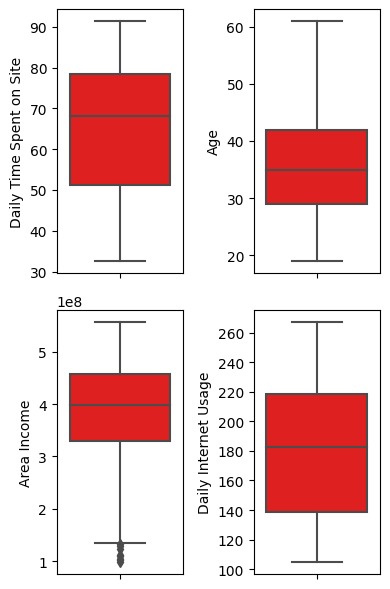

In [12]:
# boxplot
plt.figure(figsize = (4,6))
for i in range(len(nums.columns)):
  plt.subplot(2,2, i + 1)
  sns.boxplot(y = df[nums.columns[i]], color = 'red')
  plt.tight_layout()

> Adanya outliers pada fitur Area Income

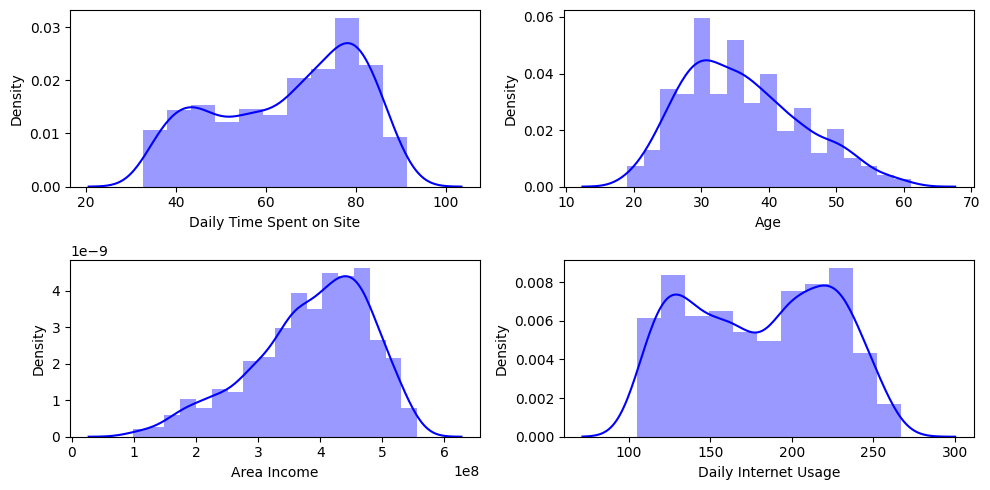

In [13]:
# distribution plot
plt.figure(figsize = (10,5))

for i in range(len(nums.columns)):
  plt.subplot(2, 2, i + 1)
  sns.distplot(df[nums.columns[i]], color = 'blue')
  plt.tight_layout()

- 'Daily Time Spent on Site' dan 'Daily Internet Usage' memiliki distribusi yang cenderung mendekati distribusi normal.
- 'Area Income' memiliki negative skewed atau skew kiri, artinya kebanyakan customer berpendapatan rendah dibandingkan berpendapatan tinggi.
- 'Age' memiliki distribusi positive skewed atau skew kanan, artinya kebanyakan customer memiliki umur lebih dari 30 tahun dibandingkan customer yang memiliki umur kurang dari itu.

## Bivariate Analysis

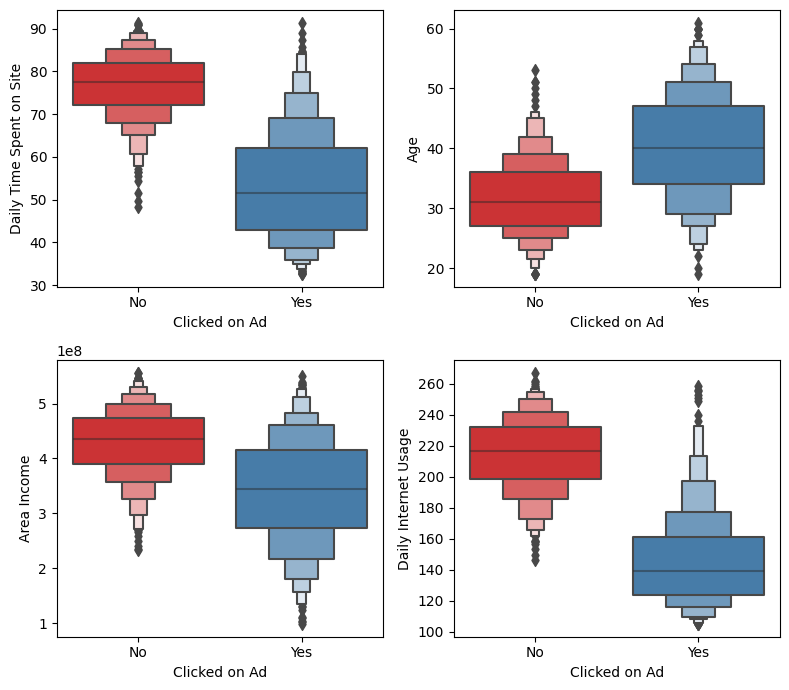

In [14]:
# boxenplot
plt.figure(figsize = (8,7))

for i in range(len(nums.columns)):
  plt.subplot(2, 2, i + 1)
  sns.boxenplot(y = df[nums.columns[i]], x = df['Clicked on Ad'], palette = 'Set1')
  plt.tight_layout()


> Semakin lama waktu yang dihabiskan di site, customer cenderung tidak klik ads.

> Rata-rata usia yang klik ads lebih tua (sekitar 40 tahun) dibading yang tidak (sekitar 30 tahun).

> Customer yang memiliki income besar cenderung tidak klik ads.

> Pengguna aktif internet cenderung mengabaikan ads.

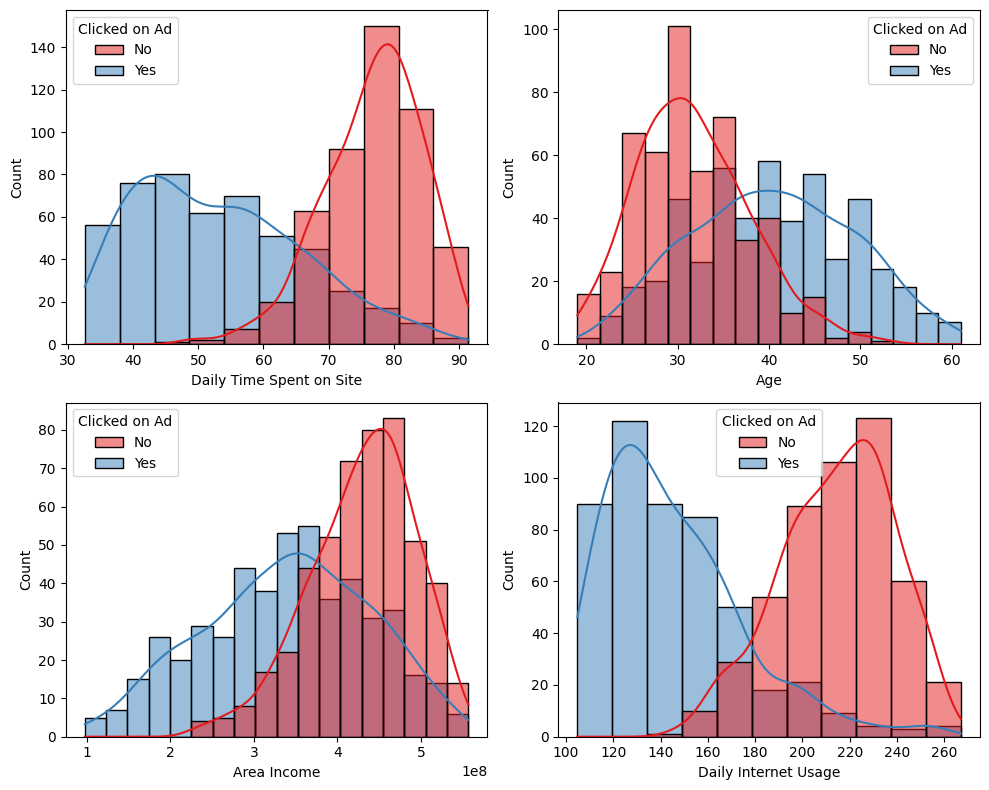

In [15]:
# histplot
plt.figure(figsize = (10, 8))

for i in range(len(nums.columns)):
  plt.subplot(2, 2, i + 1)
  sns.histplot(x = df[nums.columns[i]], hue = df['Clicked on Ad'], kde = True, palette = 'Set1')
  plt.tight_layout()

> Customer yang mengklik ads memiliki distribusi skew ke kanan, artinya waktu yang dihabiskan cenderung lebih cepat dalam menghabiskan waktu di site. Customer yang tidak mengklik ads memiliki distribusi skew ke kiri, artinya waktu yang dihabiskan di dalam site cenderung lebih lama.

> Usia customer yang mengklik ads memiliki distribusi normal. Sedangkan usia pengguna yang tidak mengklik ads cenderung yang memiliki usia lebih muda (sekitar 30 tahun).

> Pendapatan rata-rata customer yang mengklik ads memiliki distribusi normal. Sedangkan pengguna yang tidak mengklik ads cenderung yang memiliki pendapatan yang tinggi (memiliki distribusi skew kiri).

> Semakin lama penggunaan internet harian, maka kecenderungan customer mengklik ads semakin rendah. Sedangkan, semakin singkat penggunaan internet harian, maka kecenderungan pengguna yang mengklik ads semakin tinggi.

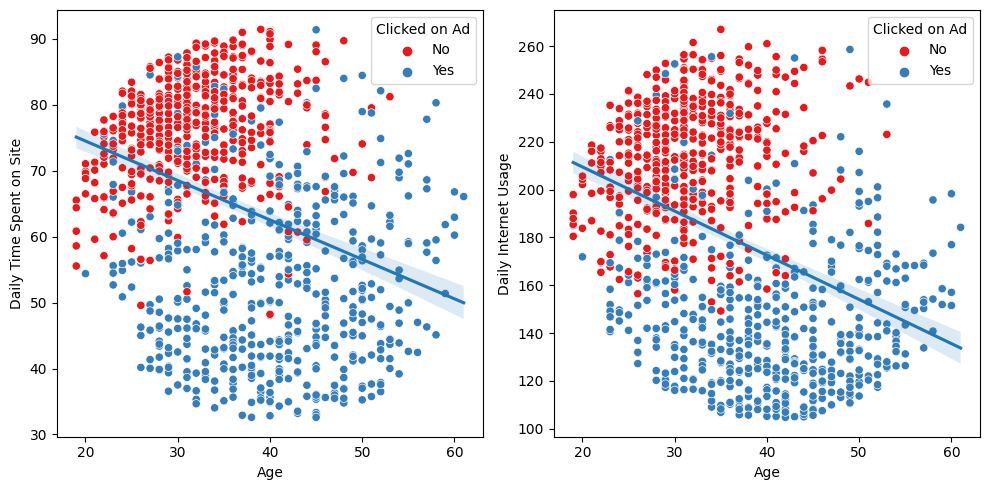

In [16]:


# scatter plot(Age Vs Daily Time Spent on Site, Daily Internet Usage)
nums2 = ['Daily Time Spent on Site', 'Daily Internet Usage']

plt.figure(figsize = (10,5))

for i in range(len(nums2)):
  plt.subplot(1, 2, i + 1)
  sns.scatterplot(x = df['Age'], y = df[nums2[i]], hue = df['Clicked on Ad'], palette = 'Set1')
  sns.regplot(x = df['Age'], y = df[nums2[i]], data=df, scatter=False)
  plt.tight_layout()

> Semakin tua usia customer, semakin singkat waktu yang dihabiskan di site dan semakin singkat penggunaan internet, maka semakin memiliki kecenderungan mengklik ads.

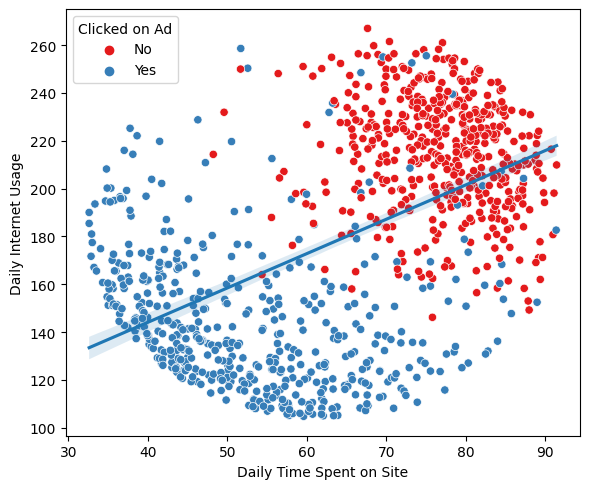

In [17]:
# scatter plot (Daily Time Spent on Site vs Daily Internet Usage)
plt.figure(figsize = (6,5))

sns.scatterplot(x = df['Daily Time Spent on Site'],
                y = df['Daily Internet Usage'],
                hue = df['Clicked on Ad'],
                palette = 'Set1')
sns.regplot(x = df['Daily Time Spent on Site'],
            y = df['Daily Internet Usage'],
            data=df, scatter=False)

plt.tight_layout()

> Semakin sedikit waktu yang dihabiskan di website dan semakin jarang penggunaan internet, maka pengguna memiliki kecenderungan lebih banyak mengklik ads.

> Semakin lama waktu yang dihabiskan di website dan semakin sering penggunaan internet, maka pengguna memiliki kecenderungan lebih sedikit mengklik ads.

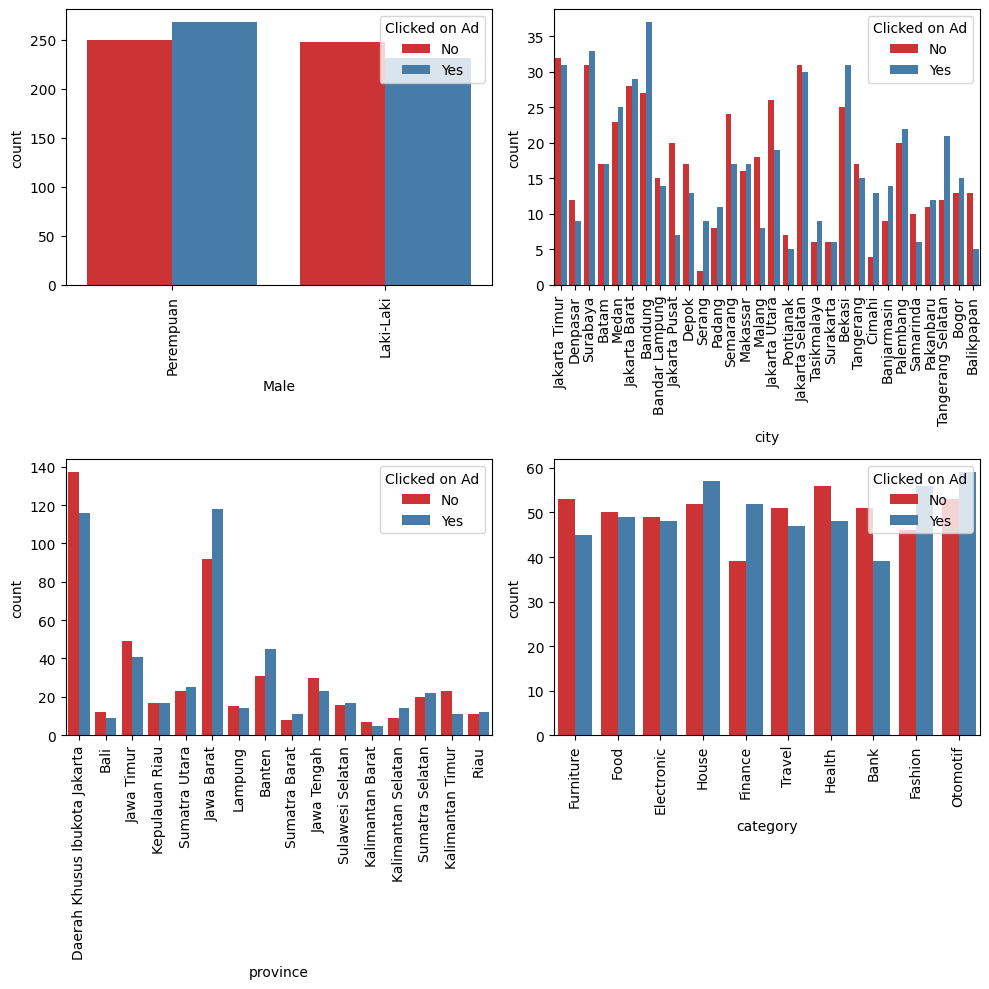

In [18]:
# categorical feature
cats2 = ['Male', 'city', 'province', 'category']

plt.figure(figsize = (10, 10))

for i in range(len(cats2)):
  plt.subplot(2, 2, i + 1)
  sns.countplot(x = df[cats2[i]], hue = df['Clicked on Ad'], palette = 'Set1')
  plt.xlabel(cats2[i])
  plt.xticks(rotation = 90)
  plt.tight_layout()

- Perempuan lebih cenderung mengklik ads dibandingkan laki-laki.
- Tiga kota yang memiliki pengguna yang mengklik ads lebih banyak dibandingkan dengan yang tidak mengkliknya berturut-turut adalah Bandung, Surabaya, dan Bekasi.
- Provinsi Jawa Barat memiliki pengguna tertinggi yang mengklik ads dibandingkan dengan yang tidak mengkliknya.
- Kategori terbanyak yang memiliki jumlah klik ads lebih besar daripada tidak dikliknya adalah otomotif. Sedangkan, kategori health merupakan kategori tertinggi yang memiliki jumlah tidak klik ads lebih besar daripada diklik.

## Multivariate Analysis

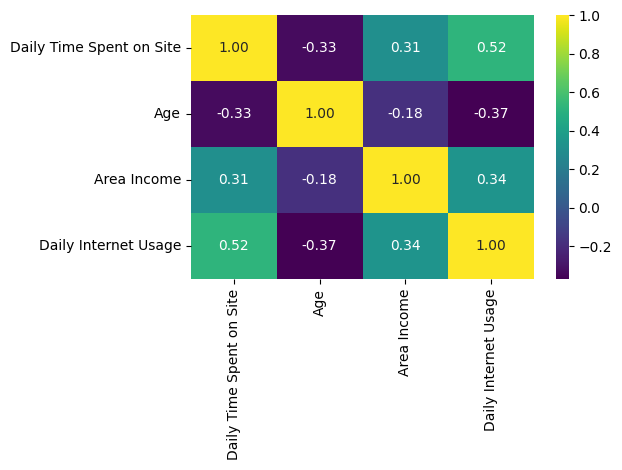

In [19]:
# heatmap correlation
df_cor = df.corr()
sns.heatmap(data = df_cor, annot = True, cmap = 'viridis', fmt = '.2f')
plt.tight_layout()

>*Daily Internet Usage* memiliki korelasi positif yang cukup tinggi dengan *Daily Time Spent on Site* (52%). Yang berarti bahwa semakin sering penggunaan internet, maka semakin lama waktu yang dihabiskan di website juga.

> Usia pengguna memiliki korelasi negatif yang cukup tinggi dengan *Daily Internet Usage* (37%) dan *Daily Time Spent on Site* (33%), yang dimana semakin tua usia semakin singkat waktu pengguaan internet harian dan semakin sebentar dalam membuka website.

> Usia juga memiliki kolerasi negatif dengan *Area Income* (18%), yang berarti semakin tua usia, maka semakin rendah area incomenya.

# Data Cleaning & Preprocessing

Bersihkan dataset dari missing value dan duplicated value (Hint: Perhatikan null/missing value, data yang kosong dapat dibuang atau diisi dengan nilai yang tidak mengubah sebaran data)

Lakukan feature encoding pada dataset (Hint: Perhatikan tipe data pada setiap kolomnya)

Split data menjadi feature dan target (Hint: Pilih satu kolom menjadi target dan sisanya menjadi feature data)

Lakukan ekstraksi pada kolom yang berhubungan dengan waktu (Hint: Buatlah kolom baru untuk mengekstraksi data waktu menjadi tahun, bulan, pekan, dan hari.)

In [20]:
df_clean = df.copy()

## Missing Values

In [21]:
df_clean.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [22]:
# fill in the missing value in numerical features with median
df_clean['Daily Time Spent on Site'].fillna(df_clean['Daily Time Spent on Site'].median(), inplace = True)
df_clean['Area Income'].fillna(df_clean['Area Income'].median(), inplace = True)
df_clean['Daily Internet Usage'].fillna(df_clean['Daily Internet Usage'].median(), inplace = True)

# fill in the missing value in categorical features with mode
df_clean['Male'].fillna(df_clean['Male'].mode()[0], inplace = True)

In [23]:
df_clean.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## Duplicated Data

In [24]:
# data duplicated check
print('Duplicated Data :', df_clean.duplicated().sum())

Duplicated Data : 0


## Outliers

In [25]:
# handle outlier with IQR
print('Jumlah outliers sebelum difilter:', len(df_clean))

for i in nums:
  Q1 = df_clean[i].quantile(0.25)
  Q3 = df_clean[i].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  filtered_entries = (df_clean[i] >= low_limit) & (df_clean[i] <= high_limit)
  df_clean = df_clean[filtered_entries]

print('Jumlah outliers setelah difilter:', len(df_clean))

Jumlah outliers sebelum difilter: 1000
Jumlah outliers setelah difilter: 991


## Feature Engineering

### Feature Extraction

In [26]:
# convert data type of Timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

In [27]:
# extract date
df_clean['year'] = df_clean['Timestamp'].apply(lambda x : x.year)
df_clean['month'] = df_clean['Timestamp'].apply(lambda x : x.month)
df_clean['week'] = df_clean['Timestamp'].apply(lambda x : x.week)
df_clean['weekday'] = df_clean['Timestamp'].apply(lambda x : x.isoweekday())
df_clean['day'] = df_clean['Timestamp'].apply(lambda x : x.day)

### Feature Encoding

- Label Encoding

In [28]:
df_clean['Male'] = df_clean['Male'].map({ 'Laki-Laki': 0,
                                              'Perempuan' : 1})
df_clean['Clicked on Ad'] = df_clean['Clicked on Ad'].map({ 'No' : 0,
                                                            'Yes' : 1})

- One Hot Encoding

In [29]:
ohe = ['category', 'city', 'province']

for i in ohe:
  print('nunique ' + i + ' = ', df_clean[i].nunique())

nunique category =  10
nunique city =  30
nunique province =  16


In [30]:
df_clean = pd.get_dummies(df_clean, columns = ['category'])

In [31]:
df_clean.sample()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,year,...,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
486,83.97,40,464041690.0,158.42,0,2016-02-02 11:49:00,0,Palembang,Sumatra Selatan,2016,...,0,0,0,0,0,0,0,1,0,0


### Feature Selection

In [32]:
df_fix = df_clean.copy()

In [33]:
# feature selection
df_fix = df_fix.select_dtypes(['float64', 'int64','uint8'])

In [34]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  991 non-null    float64
 1   Age                       991 non-null    int64  
 2   Area Income               991 non-null    float64
 3   Daily Internet Usage      991 non-null    float64
 4   Male                      991 non-null    int64  
 5   Clicked on Ad             991 non-null    int64  
 6   year                      991 non-null    int64  
 7   month                     991 non-null    int64  
 8   week                      991 non-null    int64  
 9   weekday                   991 non-null    int64  
 10  day                       991 non-null    int64  
 11  category_Bank             991 non-null    uint8  
 12  category_Electronic       991 non-null    uint8  
 13  category_Fashion          991 non-null    uint8  
 14  category_F

## Split Data

In [35]:
#import library train_test_split
from sklearn.model_selection import train_test_split

In [36]:
# split data train and test
X = df_fix.drop('Clicked on Ad', axis=1)
y = df_fix['Clicked on Ad']

# Split data - train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Experiment 1

In [37]:
# Define x_data1 and y_data1 for model in experiment 1
X1 = df_fix.drop('Clicked on Ad', axis = 1)
y1 = df_fix['Clicked on Ad']

In [38]:
#data train: 80%, data test: 20% for model in experiment 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [39]:
# check number of data train and data test
print('Total rows & columns of train set:', X_train1.shape)
print('Total rows & columns of test set:', X_test1.shape)

Total rows & columns of train set: (792, 20)
Total rows & columns of test set: (199, 20)


### Experiment 2

In [40]:
# Define x_data and y_data for model in experiment 2
X2 = df_fix.drop('Clicked on Ad', axis = 1)
y2 = df_fix[['Clicked on Ad']]

In [41]:
# Standardisation of Data for model in experiment 2
cols = X2.columns
from sklearn.preprocessing import StandardScaler
for i in range(0, len(cols)):
  X2[cols[i]] = StandardScaler().fit_transform(X2[cols[i]].values.reshape(len(X2), 1))

In [42]:
#data train : 80%, data test : 20% for in experiment 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [43]:
# check number of data train and data test
print('Total rows & columns of train set:', X_train2.shape)
print('Total rows & columns of test set:', X_test2.shape)

Total rows & columns of train set: (792, 20)
Total rows & columns of test set: (199, 20)


# Data Modeling

In [44]:
from datetime import datetime as dt
from collections import defaultdict
from xgboost import XGBClassifier
import lightgbm as lgb
import time

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, f1_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
# modelng function
def modeling(x_train,x_test,y_train,y_test):
    result = defaultdict(list)

    lr = LogisticRegression()
    nb = GaussianNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    xgb = XGBClassifier()
    grad = GradientBoostingClassifier()
    ab = AdaBoostClassifier()
    LGBM = lgb.LGBMClassifier()


    list_model = [('Logistic Regression', lr),
                  ('Naive Bayes', nb),
                  ('K-Nearest Neighbor', knn),
                  ('Decision Tree', dt),
                  ('Random Forest', rf),
                  ('XgBoost', xgb),
                  ('Gradient Boosting', grad),
                  ('Ada Boost', ab),
                  ('LightGBM', LGBM)]

    for model_name, model in list_model:

        model.fit(x_train,y_train)

        y_pred_train = model.predict(x_train)
        y_pred = model.predict(x_test)

        # evaluation model
        accuracy_test = accuracy_score(y_test,y_pred)
        accuracy_train = accuracy_score(y_train,y_pred_train)

        recall_test = recall_score(y_test,y_pred)
        recall_train = recall_score(y_train,y_pred_train)

        precision_test = precision_score(y_test,y_pred)
        precision_train = precision_score(y_train,y_pred_train)

        fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label = 1)
        auc_test = auc(fpr, tpr)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
        auc_train = auc(fpr, tpr)

        f1_test = f1_score(y_test, y_pred)
        f1_train = f1_score(y_train,y_pred_train)


        # print result
        result['model_name'].append(model_name)
        result['model'].append(model)

        result['accuracy (test)'].append(accuracy_test)
        result['accuracy (train)'].append(accuracy_train)
        result['recall (test)'].append(recall_test)
        result['recall (train)'].append(recall_train)
        result['precision (test)'].append(precision_test)
        result['precision (train)'].append(precision_train)
        result['AUC (test)'].append(auc_test)
        result['AUC (train)'].append(auc_train)
        result['f1-score (test)'].append(f1_test)
        result['f1-score (train)'].append(f1_train)

    return result

### Experiment 1
Without Standardization

(sebelum normalisasi/standardisasi))

In [46]:
evaluation_summary_1 = modeling(X_train1,X_test1,y_train1,y_test1)
evaluation_summary_1 = pd.DataFrame(evaluation_summary_1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 395, number of negative: 397
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498737 -> initscore=-0.005051
[LightGBM] [Info] Start training from score -0.005051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [47]:
evaluation_summary_1

,model_name,model,accuracy (test),accuracy (train),recall (test),recall (train),precision (test),precision (train),AUC (test),AUC (train),f1-score (test),f1-score (train)
0,Logistic Regression,LogisticRegression(),0.517588,0.501263,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
1,Naive Bayes,GaussianNB(),0.653266,0.726010,0.489583,0.625316,0.701493,0.781646,0.725756,0.647704,0.576687,0.694796
2,K-Nearest Neighbor,KNeighborsClassifier(),0.618090,0.775253,0.489583,0.739241,0.635135,0.795640,0.775162,0.613724,0.552941,0.766404
3,Decision Tree,DecisionTreeClassifier(),0.959799,1.000000,0.958333,1.000000,0.958333,1.000000,1.000000,0.959749,0.958333,1.000000
4,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.974874,1.000000,0.968750,1.000000,0.978947,1.000000,1.000000,0.974666,0.973822,1.000000
5,XgBoost,"XGBClassifier(base_score=None, booster=None, c...",0.969849,1.000000,0.958333,1.000000,0.978723,1.000000,1.000000,0.969458,0.968421,1.000000
6,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.969849,0.998737,0.968750,0.997468,0.968750,1.000000,0.998734,0.969812,0.968750,0.998733
7,Ada Boost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.964824,0.986111,0.968750,0.977215,0.958763,0.994845,0.986089,0.964958,0.963731,0.985951
8,LightGBM,LGBMClassifier(),0.964824,1.000000,0.958333,1.000000,0.968421,1.000000,1.000000,0.964604,0.963351,1.000000


#### Result

In [48]:
lr1 = LogisticRegression()
nb1 = GaussianNB()
knn1 = KNeighborsClassifier()
dt1 = DecisionTreeClassifier()
rf1 = RandomForestClassifier()
xgb1 = XGBClassifier()
grad1 = GradientBoostingClassifier()
ab1 = AdaBoostClassifier()
LGBM1 = lgb.LGBMClassifier()

In [49]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = lr1
models_dict["Naive Bayes"] = nb1
models_dict["KNearest Neighbors"] = knn1
models_dict["Decision Tree"] = dt1
models_dict["Random Forest"] = rf1
models_dict["XGB"] = xgb1
models_dict["Gradient Boosting"] = grad1
models_dict["Ada Boost"] = ab1
models_dict["LGBM"] = LGBM1

In [50]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train1,y_train1)

Training model Logistic Regression
CPU times: user 9.32 ms, sys: 1.9 ms, total: 11.2 ms
Wall time: 8.56 ms
Training model Naive Bayes
CPU times: user 4.67 ms, sys: 5.03 ms, total: 9.7 ms
Wall time: 4.86 ms
Training model KNearest Neighbors
CPU times: user 4.03 ms, sys: 4.08 ms, total: 8.11 ms
Wall time: 4.08 ms
Training model Decision Tree
CPU times: user 10.8 ms, sys: 7.92 ms, total: 18.7 ms
Wall time: 9.43 ms
Training model Random Forest
CPU times: user 260 ms, sys: 85.5 ms, total: 345 ms
Wall time: 255 ms
Training model XGB
CPU times: user 205 ms, sys: 5.33 ms, total: 210 ms
Wall time: 108 ms
Training model Gradient Boosting
CPU times: user 240 ms, sys: 1.84 ms, total: 242 ms
Wall time: 243 ms
Training model Ada Boost
CPU times: user 117 ms, sys: 0 ns, total: 117 ms
Wall time: 122 ms
Training model LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 395, number of negative: 397
[LightGBM] [Warning] Auto-choosing 

In [51]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(X_test1)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(X_train1)
    train_prediction_results.append(model_pred_train)

    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 11.87 ms
Model on Naive Bayes
elapsed time: 6.66 ms
Model on KNearest Neighbors
elapsed time: 140.37 ms
Model on Decision Tree
elapsed time: 6.94 ms
Model on Random Forest
elapsed time: 30.9 ms
Model on XGB
elapsed time: 8.66 ms
Model on Gradient Boosting
elapsed time: 7.55 ms
Model on Ada Boost
elapsed time: 28.2 ms
Model on LGBM
elapsed time: 14.68 ms


In [52]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train1, y_pred))
    recall_train.append(recall_score(y_train1, y_pred))
    accuracy_train.append(accuracy_score(y_train1, y_pred))
    confusion_m_train.append(confusion_matrix(y_train1, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test1, y_pred))
    recall_test.append(recall_score(y_test1, y_pred))
    accuracy_test.append(accuracy_score(y_test1, y_pred))
    confusion_m_test.append(confusion_matrix(y_test1, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results1 = pd.DataFrame(data = eval_dict)
df_results1 = df_results1.set_index("model")
result1 = df_results1.sort_values(['Recall_test', 'Recall_train', 'Accuracy_test','Accuracy_train'], ascending = False)

### Experiment 2
 With Standardization

(setelah normalisasi/standardisasi))

In [53]:
evaluation_summary_2 = modeling(X_train2,X_test2,y_train2,y_test2)
evaluation_summary_2 = pd.DataFrame(evaluation_summary_2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 395, number of negative: 397
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498737 -> initscore=-0.005051
[LightGBM] [Info] Start training from score -0.005051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [54]:
evaluation_summary_2

,model_name,model,accuracy (test),accuracy (train),recall (test),recall (train),precision (test),precision (train),AUC (test),AUC (train),f1-score (test),f1-score (train)
0,Logistic Regression,LogisticRegression(),0.969849,0.970960,0.968750,0.962025,0.968750,0.979381,0.970937,0.969812,0.968750,0.970626
1,Naive Bayes,GaussianNB(),0.969849,0.963384,0.968750,0.962025,0.968750,0.964467,0.963380,0.969812,0.968750,0.963245
2,K-Nearest Neighbor,KNeighborsClassifier(),0.944724,0.955808,0.906250,0.924051,0.977528,0.986486,0.955728,0.943416,0.940541,0.954248
3,Decision Tree,DecisionTreeClassifier(),0.954774,1.000000,0.947917,1.000000,0.957895,1.000000,1.000000,0.954541,0.952880,1.000000
4,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.974874,1.000000,0.968750,1.000000,0.978947,1.000000,1.000000,0.974666,0.973822,1.000000
5,XgBoost,"XGBClassifier(base_score=None, booster=None, c...",0.969849,1.000000,0.958333,1.000000,0.978723,1.000000,1.000000,0.969458,0.968421,1.000000
6,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.969849,0.998737,0.968750,0.997468,0.968750,1.000000,0.998734,0.969812,0.968750,0.998733
7,Ada Boost,"(DecisionTreeClassifier(max_depth=1, random_st...",0.964824,0.986111,0.968750,0.977215,0.958763,0.994845,0.986089,0.964958,0.963731,0.985951
8,LightGBM,LGBMClassifier(),0.974874,1.000000,0.968750,1.000000,0.978947,1.000000,1.000000,0.974666,0.973822,1.000000


#### Result

In [55]:
lr2 = LogisticRegression()
nb2 = GaussianNB()
knn2 = KNeighborsClassifier()
dt2 = DecisionTreeClassifier()
rf2 = RandomForestClassifier()
xgb2 = XGBClassifier()
grad2 = GradientBoostingClassifier()
ab2 = AdaBoostClassifier()
LGBM2 = lgb.LGBMClassifier()

In [56]:
# define model
models_dict = {}
models_dict["Logistic Regression"] = lr2
models_dict["Naive Bayes"] = nb2
models_dict["KNearest Neighbors"] = knn2
models_dict["Decision Tree"] = dt2
models_dict["Random Forest"] = rf2
models_dict["XGB"] = xgb2
models_dict["Gradient Boosting"] = grad2
models_dict["Ada Boost"] = ab2
models_dict["LGBM"] = LGBM2

In [57]:
for model_name, model in models_dict.items():
    print(f"Training model {model_name}")
    %time model.fit(X_train2,y_train2)

Training model Logistic Regression
CPU times: user 12 ms, sys: 13 ms, total: 25.1 ms
Wall time: 23.9 ms
Training model Naive Bayes
CPU times: user 5.52 ms, sys: 4.14 ms, total: 9.66 ms
Wall time: 4.9 ms
Training model KNearest Neighbors
CPU times: user 3.85 ms, sys: 3.18 ms, total: 7.03 ms
Wall time: 3.52 ms
Training model Decision Tree
CPU times: user 9.13 ms, sys: 10 ms, total: 19.1 ms
Wall time: 9.6 ms
Training model Random Forest
CPU times: user 247 ms, sys: 72.7 ms, total: 320 ms
Wall time: 239 ms
Training model XGB
CPU times: user 221 ms, sys: 3.18 ms, total: 224 ms
Wall time: 122 ms
Training model Gradient Boosting
CPU times: user 241 ms, sys: 0 ns, total: 241 ms
Wall time: 238 ms
Training model Ada Boost
CPU times: user 126 ms, sys: 0 ns, total: 126 ms
Wall time: 127 ms
Training model LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 395, number of negative: 397
[LightGBM] [Warning] Auto-choosing row-wise 

In [58]:
# create list to store prediciton results
import time
train_prediction_results = []
test_prediction_results = []

train_val_time_elapsed = []

for model_name, model in models_dict.items():
    tstart = time.time()
    print(f"Model on {model_name}")
    # predict
    model_pred_test = model.predict(X_test2)
    test_prediction_results.append(model_pred_test)

    # append result to list
    model_pred_train = model.predict(X_train2)
    train_prediction_results.append(model_pred_train)

    tfinish = time.time()
    time_elapsed = round((tfinish - tstart)*1000, 2)
    train_val_time_elapsed.append(time_elapsed)
    print(f"elapsed time: {time_elapsed} ms")

Model on Logistic Regression
elapsed time: 4.06 ms
Model on Naive Bayes
elapsed time: 7.43 ms
Model on KNearest Neighbors
elapsed time: 152.03 ms
Model on Decision Tree
elapsed time: 4.97 ms
Model on Random Forest
elapsed time: 39.05 ms
Model on XGB
elapsed time: 57.63 ms
Model on Gradient Boosting
elapsed time: 9.39 ms
Model on Ada Boost
elapsed time: 41.75 ms
Model on LGBM
elapsed time: 18.51 ms


In [59]:
# create list to append evaluation metrics train
precision_train = []
recall_train = []
accuracy_train = []
confusion_m_train = []

# calculate error train
for y_pred in train_prediction_results:
    precision_train.append(precision_score(y_train2, y_pred))
    recall_train.append(recall_score(y_train2, y_pred))
    accuracy_train.append(accuracy_score(y_train2, y_pred))
    confusion_m_train.append(confusion_matrix(y_train2, y_pred))

# create list to append evaluation metrics train
precision_test = []
recall_test = []
accuracy_test = []
confusion_m_test = []

# calculate error train
for y_pred in test_prediction_results:
    precision_test.append(precision_score(y_test2, y_pred))
    recall_test.append(recall_score(y_test2, y_pred))
    accuracy_test.append(accuracy_score(y_test2, y_pred))
    confusion_m_test.append(confusion_matrix(y_test2, y_pred))
models_name = list(models_dict.keys())

# create dataframe for model performances
eval_dict = {
    'model':models_dict.keys(),
    'Recall_test': recall_test,
    'Recall_train': recall_train,
    'Accuracy_test': accuracy_test,
    'Accuracy_train': accuracy_train,
    'Time_Elapsed': train_val_time_elapsed
}
df_results2 = pd.DataFrame(data = eval_dict)
df_results2 = df_results2.set_index("model")
result2 = df_results2.sort_values(['Recall_test', 'Recall_train', 'Accuracy_test','Accuracy_train'], ascending = False)

### Conclution

In [60]:
result1

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Random Forest,0.968750,1.000000,0.964824,1.000000,30.90
Gradient Boosting,0.968750,0.997468,0.969849,0.998737,7.55
Ada Boost,0.968750,0.977215,0.964824,0.986111,28.20
XGB,0.958333,1.000000,0.969849,1.000000,8.66
LGBM,0.958333,1.000000,0.964824,1.000000,14.68
Decision Tree,0.947917,1.000000,0.949749,1.000000,6.94
KNearest Neighbors,0.489583,0.739241,0.618090,0.775253,140.37
Naive Bayes,0.489583,0.625316,0.653266,0.726010,6.66
Logistic Regression,0.000000,0.000000,0.517588,0.501263,11.87


In [61]:
result2

,Recall_test,Recall_train,Accuracy_test,Accuracy_train,Time_Elapsed
model,,,,,
Random Forest,0.968750,1.000000,0.974874,1.000000,39.05
LGBM,0.968750,1.000000,0.974874,1.000000,18.51
Gradient Boosting,0.968750,0.997468,0.969849,0.998737,9.39
Ada Boost,0.968750,0.977215,0.964824,0.986111,41.75
Logistic Regression,0.968750,0.962025,0.969849,0.970960,4.06
Naive Bayes,0.968750,0.962025,0.969849,0.963384,7.43
XGB,0.958333,1.000000,0.969849,1.000000,57.63
Decision Tree,0.937500,1.000000,0.959799,1.000000,4.97
KNearest Neighbors,0.906250,0.924051,0.944724,0.955808,152.03


1. Performa dari hasil train dan tes baik tanpa maupun dengan standardisasi tidak adanya perbedaan yang signifikan.

2. Sebagian besar model memiliki performa yang lebih baik setelah dilakukan standardisasi, terutama Logistic Regression, Naive Bayes, KNN yang memiliki peningkatan secara signifikan.

3. Dilihat dari waktu modeling, sebelum dilakukan standardisasi, Decision Tree adalah yang tercepat, sedangkan setalah dilakukan standardisasi - juga Decision Tree.

4. Dari hasil yang ada diambil kesimpulan bahwa model yang digunakan adalah model dengan **LGBM setelah distandardisasi** memiliki nilai recall dan akurasi paling tinggi dibanding model lainnya.

## Confussion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
model = lgb.LGBMClassifier()
model.fit(X_train2, y_train2)

y_pred_train = model.predict(X_train2)
y_pred_test = model.predict(X_test2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 395, number of negative: 397
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 918
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498737 -> initscore=-0.005051
[LightGBM] [Info] Start training from score -0.005051
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

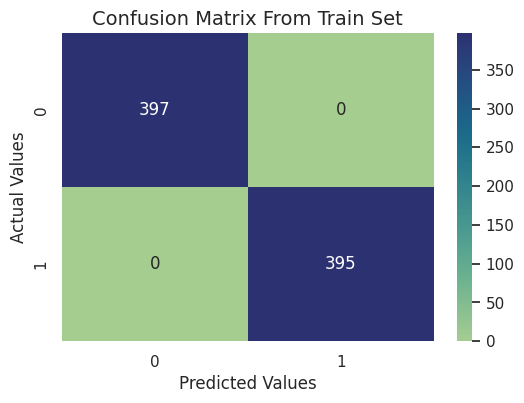

In [64]:
cfm_train = confusion_matrix(y_train2, y_pred_train)

plt.figure(figsize=(6,4))
sns.set(font_scale = 1)
ax = sns.heatmap(cfm_train, annot = True, fmt = 'd', cmap="crest")

plt.title('Confusion Matrix From Train Set', fontsize = 14)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

plt.show()

> Dari 395 data aktual yang mengklik ad pada data train, seluruhnya diprediksi mengklik ad.

> Dari 397 data aktual yang tidak mengklik ad pada data train, seluruhnya diprediksi tidak mengklik ad.

> Dapat disimpulkan bahwa performa model sudah sangat bagus karena sudah tepat memprediksi.

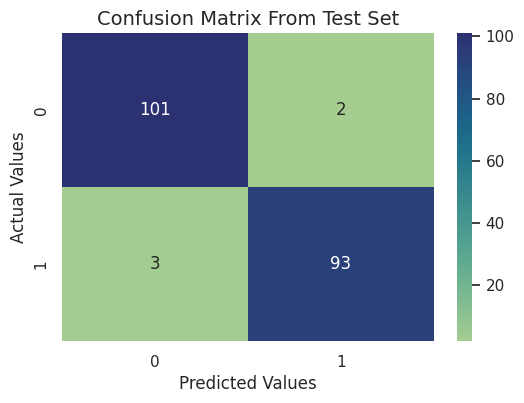

In [65]:
cfm_test = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize=(6,4))
sns.set(font_scale = 1)
ax = sns.heatmap(cfm_test, annot = True, fmt = 'd', cmap="crest")
plt.title('Confusion Matrix From Test Set', fontsize = 14)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

> Dari 96 data aktual yang mengklik ad pada data test, terdapat 93 data diprediksi mengklik ad dan 3 data diprediksi tidak mengklik ad (seharusnya mengklik tetapi diprediksi kebalikannya).

> Dari 103 data aktual yang tidak mengklik ad pada data test, terdapat 101 data diprediksi tidak mengklik ad dan 2 data diprediksi mengklik ad (seharusnya tidak mengklik tetapi diprediksi kebalikannya).

> Disimpulkan bahwa performa model sudah sangat bagus karena mengurangi nilai kesalahan pada prediksi di data aktualnya.

## Feature Important

In [66]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [67]:
tes = df.groupby(['Clicked on Ad'])['Age'].agg(['median']).reset_index()
tes

,Clicked on Ad,median
0,No,31.0
1,Yes,40.0


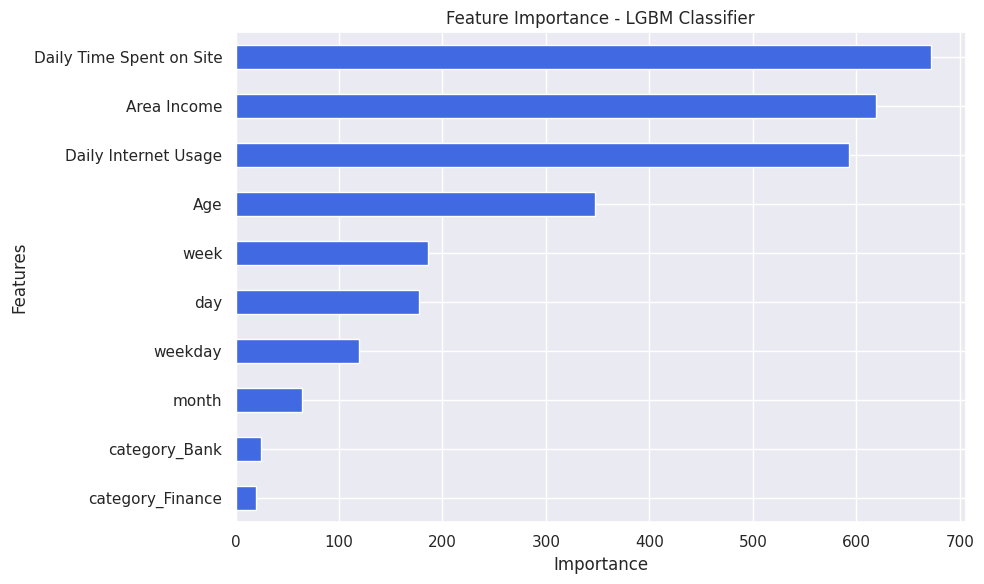

In [68]:
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
ax = feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 6), color = 'royalblue')
ax.invert_yaxis()

plt.title('Feature Importance - LGBM Classifier')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

Feature yang paling mempengaruhi keputusan user untuk mengklik ad (iklan) adalah Daily Internet Usage, selain itu Area Income, Daily Time Spent on Site dan Age juga cukup mempengaruhi.

- Semakin rendah Daily Internet Usage, maka semakin cenderung untuk user mengklik iklan, sedangkan semakin tinggi Daily Internet Usage, maka semakin cenderung user untuk tidak mengklik iklan.

- Semakin tinggi Income maka user akan semakin cenderung untuk tidak klik iklan, sedangkan semakin rendah Income maka user lebih cenderung klik iklan.

- Semakin rendah Daily Time Spent on Site, maka semakin cenderung user mengklik iklan, sedangkan semakin tinggi Daily Time Spent on Site, maka semakin cenderung untuk user tidak mengklik iklan.

- User dengan usia yang semakin tua, lebih cenderung klik iklan, sedangkan user dengan usia yang lebih muda, cenderung tidak tertarik dengan iklan.

# Business Recomendation and Simulation

## Recomendation

Berdasarkan feature importance dan hasil EDA, dapat ditarik kesimpulan bahwa untuk meningkatkan ketertarikan customer dalam melihat iklan ada beberapa poin yang perlu diperhatikan:

- Perusahaan harus memerhatikan ketertarikan customer selama mereka menghabiskan waktu di website. Iklan yang ditampilkan adalah iklan yang sesuai dengan ketertarikan user tersebut.

- Penampilan iklan di website sebaiknya dikurangi untuk customer yang memiliki income di bawah 400 juta. Karena customer yang memiliki nominal income dibawah itu cenderung tidak mengklik iklan walaupun durasi yang dihabiskan dan penggunaan internet pada website tersebut tinggi.

- User dengan penggunaan internet harian dan waktu harian berkunjung pada website yang cukup tinggi, sebaiknya tidak diberikan iklan, kelompok ini cenderung mengabaikan iklan. Dengan ini dapat mengurangi beban biaya untuk menampilkan iklan.

- Customer dengan usia dibawah 35-38 tahun cenderung tidak tertarik dengan iklan, pada usia ini sebaiknya frekuensi munculnya iklan dikurangi. Hal ini dapat mengurangi beban biaya marketing.

- Agar iklan lebih tepat sasaran, dapat dilakukan modeling lebih lanjut seperti melakukan klustering custumer, agar dapat menampilkan iklan yang sesuai dengan karakteristik masing-masing user. Sehingga diharapkan akan lebih banyak yang mengklik ad dan kegiatan marketing ini akan menjadi lebih efektif.

## Simulation

**Before using machine learning :**

In [70]:
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

- Biaya iklan (cost) = budget x jumlah user = Rp500 x 1000 = Rp500.000

- Conversion rate = 50% (500/1000 user yang klik iklan)
- Revenue = harga x jumlah klik = Rp2.000 x 500 = Rp1.000.000
- Profit = Rp1.000.000 - Rp500.000 = Rp500.000

**After using machine learning :**

In [72]:
evaluation_summary_2[evaluation_summary_2['model_name'].str.contains('LightGBM')]

,model_name,model,accuracy (test),accuracy (train),recall (test),recall (train),precision (test),precision (train),AUC (test),AUC (train),f1-score (test),f1-score (train)
8,LightGBM,LGBMClassifier(),0.974874,1.0,0.96875,1.0,0.978947,1.0,1.0,0.974666,0.973822,1.0


Conversion rate pada model yang digunakan adalah sebesar 97%, artinya dari 1000 user yang menerima iklan, 970 diantaranya yang mengklik iklan.

Sehingga, dengan cost yang sama:
- Revenue = Rp2.000,00 * 970 = Rp1.940.000,00
- Profit = Rp1.940.000,00 - Rp500.000 = Rp1.440.000,00

**Conclution :**

Pada simulasi situasi tersebut, bahwa jika tidak menggunakan machine learning, profit yang diperoleh sebesar Rp500.000,00, sedangkan dengan menggunakan machine learning, profit yang diperoleh akan meningkat hampir 3 kali lipat dari profit yang diperoleh sebelumnya.

Dari hasil ini bahwa machine learning dapat meningkatkan revenue dan tentunya juga profit dari perusahaan dengan hasil yang cukup signifikan.